In [20]:
import pandas as pd
import numpy as np
import sys
import os
from skimage import io
import matplotlib.pyplot as plt

In [27]:
PATH = os.path.dirname(os.path.realpath("Results/Results_750ng_2908.csv"))
print('PATH', str(PATH))
PATH=os.getcwd()

PATH C:\Users\j-wu1\Downloads\DataAnalysis\Results\Results


In [42]:
os.chdir(PATH)
files = filter(os.path.isfile, os.listdir(PATH))

data = []

def first_char(x,nb=14):
    return(x[:nb])

files = sorted(files, key = first_char)

for i, filename in enumerate(files):
    print(str(i-1)+' - '+filename)
        
    if (filename.endswith('.csv')):
        data.append(pd.read_csv(filename, sep=';|,'))
        #data[i-1].drop(columns='Unnamed: 0', inplace=True)
        data[i-1] = data[i-1].rename(columns={'Unnamed: 0':filename})
    else:
        continue


-1 - .DS_Store
0 - A_10ng_new_analysis_26_08_ROI_1.csv
1 - A_10ng_new_analysis_26_08_ROI_2.csv
2 - B_5ng_ROI_1_20210827.csv
3 - B_5ng_ROI_2_20210827.csv
4 - B_5ng_new_ROI_1_20210831.csv
5 - B_5ng_new_ROI_2_20210831_.csv
6 - C_1ng_ROI_1_20210830.csv
7 - C_1ng_ROI_2_20210830.csv
8 - E_500pg_ROI_1_20210827.csv
9 - E_500pg_ROI_2_20210827.csv
10 - F_200pg_ROI_1_20210828.csv
11 - F_200pg_ROI_2_20210828.csv
12 - F_200pg_new_ROI_1_20210831.csv
13 - F_200pg_new_ROI_2_20210831.csv
14 - G_100pg_ROI_1-9-90pix_20210828.csv
15 - G_100pg_ROI_2-9-90pix_20210828.csv
16 - H_50pg_ROI_1-9-90pix_20210828.csv
17 - H_50pg_ROI_2-9-90pix_20210828.csv
18 - I_blank2_ROI_1_2808.csv
19 - I_blank2_ROI_2_2808.csv


<ipython-input-42-fead7336cbbf>:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data.append(pd.read_csv(filename, sep=';|,'))


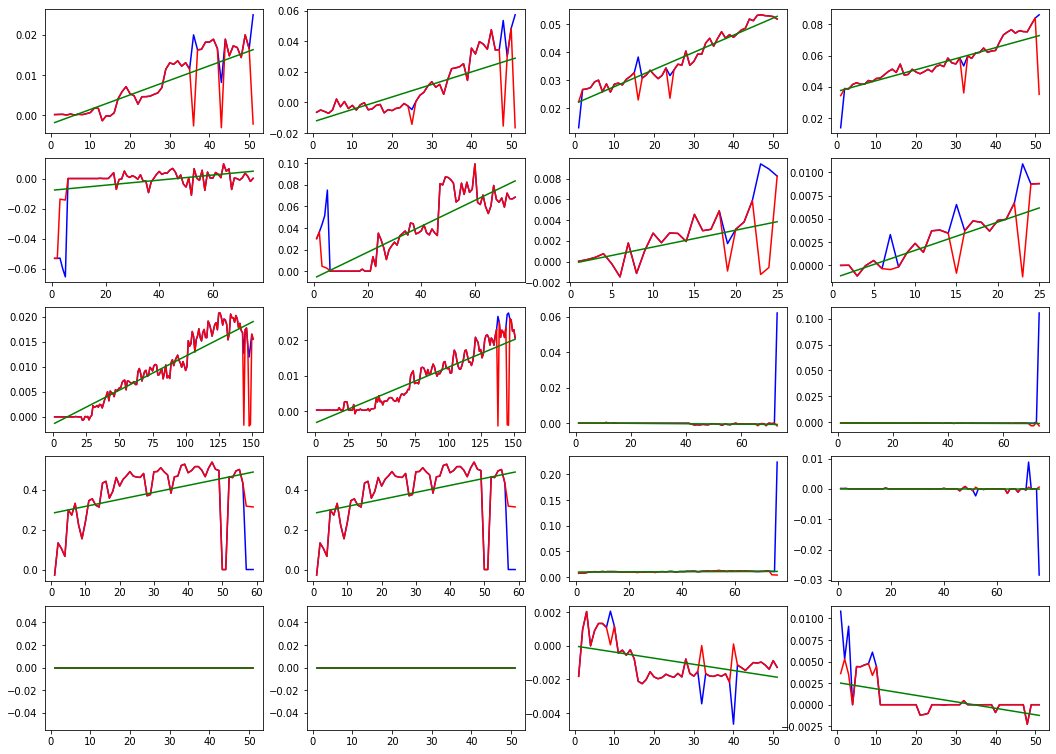

In [80]:
from scipy.stats import linregress
import copy

def puredatalist(data):
    data_dict=data.to_dict()
    data_s=list(data_dict['Signal'].items())
    pure_data=[y[1] for y in data_s]
    
    return pure_data

#remove outliers accordingb to deviation of the predicted compared to the origins
def replacewithpredvalue(odata, ndata):
    diff=abs(odata-ndata)
    pos=diff.argsort()[-3:][::-1]
    for index in range(len(pos)):
        odata[pos[index]] = ndata[index]
    return odata

plt.figure(figsize=(18,16))
data_signal=[]
for i in range(len(data)):
    data_value=np.array(puredatalist(data[i]))
    value_tuple=(np.mean(data_value),np.std(data_value))
    x=np.array(range(len(data_value)))+1
    y=copy.deepcopy(data_value)
    slope, intercept, r, p, se = linregress(x, y)
    #remove outliers
    ny=intercept+slope*x
    new_data_value=replacewithpredvalue(data_value,ny)
    #new gradient and correlation below
    slope_n, intercept_n, r_n, p_n, se_n = linregress(x, new_data_value)
    ########################
    nny=intercept_n+slope_n*x
    
    plt.subplot(6,4,i+1)
    plt.plot(list(x),list(y),'b')
    plt.plot(list(x),list(new_data_value),'r')
    plt.plot(list(x),list(nny),'g')
    ########################
    trend_grad_r=(slope_n,abs(r_n))
    data_signal=data_signal+[trend_grad_r]

concen_list=[1e4,1e4,5e3,5e3,5e3,5e3,1e3,1e3,500,500,200,200,200,200,100,100,50,50,0.1,0.1]

[0.0003617953598014751, 0.0008173939334418403, 0.0006129897500562877, 0.0007024733096146, 0.00016915206113643134, 0.0012021977393946858, 0.0001628090067479204, 0.00030356472025686975, 0.00013545835259208354, 0.0001557664619908551, -1.1754696196938979e-05, -9.13833695256462e-06, 0.003510838843346622, 0.003510838843346622, 1.570979052334512e-05, -1.5585793352454518e-06, 0.0, 0.0, -3.643997383507881e-05, -7.48387015955716e-05]


Text(0, 0.5, 'total_correlation')

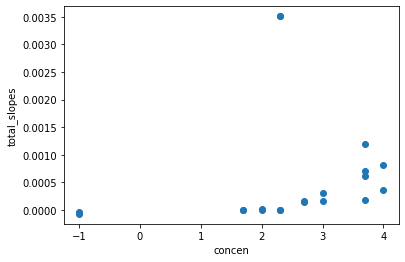

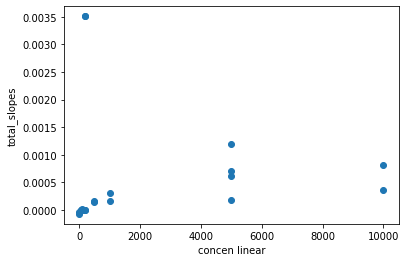

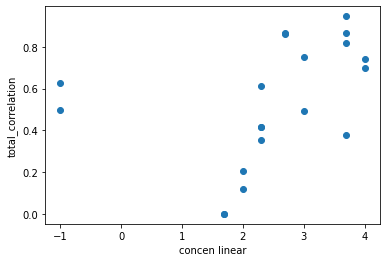

In [89]:
from math import log

total_grads=[y[0] for y in data_signal]
print(total_grads)
total_cor=[y[1] for y in data_signal]
plot_sample=[log(y,10) for y in concen_list]
plt.figure()
plt.scatter(plot_sample, total_grads)
plt.xlabel('concen')
plt.ylabel('total_slopes')

plt.figure()
plt.scatter(concen_list, total_grads)
plt.xlabel('concen linear')
plt.ylabel('total_slopes')

plt.figure()
plt.scatter(plot_sample, total_cor)
plt.xlabel('concen linear')
plt.ylabel('total_correlation')

Text(0, 0.5, 'correlation')

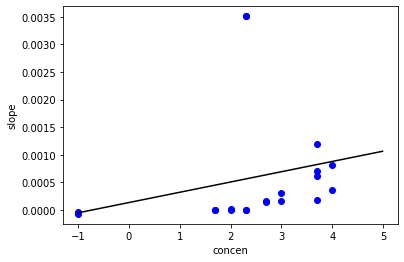

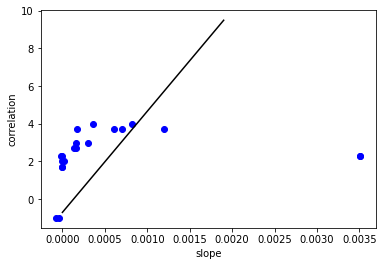

In [104]:
from numpy.polynomial import polynomial as P

coefs =P.polyfit(np.array(total_grads), np.array(plot_sample), deg=1, rcond=None, full=False, w=np.array(total_cor))
coefs2 =P.polyfit(np.array(plot_sample), np.array(total_grads),deg=1, rcond=None, full=False, w=np.array(total_cor))
X_seq=np.arange(start=0, stop=0.002,step=0.0001)
X_seq2=np.arange(start=-1, stop=5,step=0.01)
plt.figure()
plt.plot(X_seq2, np.polyval(coefs2, X_seq2), color="black")
plt.scatter(np.array(plot_sample),np.array(total_grads),color='b')
plt.xlabel('concen')
plt.ylabel('slope')
coefs3=[1/coefs2[0],-coefs2[1]/coefs2[0]]
plt.figure()
plt.plot(X_seq, np.polyval(coefs3, X_seq), color="black")
plt.scatter(np.array(total_grads),np.array(plot_sample),color='b')
plt.xlabel('slope')
plt.ylabel('correlation')

In [5]:
#Separate data
'''
d100pg_R1 = data[0]  
d100pg_R2 = data[1] 
d10ng_R1 = data[2]  
d10ng_R2 = data[3]  
d1ng_R1 = data[4] 
d1ng_R2 = data[5]   
d200pg_R1 = data[6]  
d200pg_R1_2 = data[7]
d200pg_R2 = data[8]  
d200pg_R2_2 = data[9]
d500pg_R1 = data[10] 
d500pg_R2 = data[11]
d50pg_R1 = data[12]  
d50pg_R2 = data[13]  
d5ng_R1 = data[15] 
d5ng_R2 = data[14] 
d5ng_R1_2 = data[16]
d5ng_R2_2 = data[17] 
d750pg_R1 = data[18]
dblank_R1 = data[19] 
dblank_R2 = data[20] 

data = [d10ng_R1, d10ng_R2, d5ng_R1,d5ng_R2,d5ng_R1_2,d5ng_R2_2,d1ng_R1, d1ng_R2, d500pg_R1, d500pg_R2, d200pg_R1, d200pg_R2,d200pg_R1_2, d200pg_R2_2, d100pg_R1, d100pg_R2, d50pg_R1, d50pg_R2,  dblank_R1, dblank_R2]


'''





'\nd100pg_R1 = data[0]  \nd100pg_R2 = data[1] \nd10ng_R1 = data[2]  \nd10ng_R2 = data[3]  \nd1ng_R1 = data[4] \nd1ng_R2 = data[5]   \nd200pg_R1 = data[6]  \nd200pg_R1_2 = data[7]\nd200pg_R2 = data[8]  \nd200pg_R2_2 = data[9]\nd500pg_R1 = data[10] \nd500pg_R2 = data[11]\nd50pg_R1 = data[12]  \nd50pg_R2 = data[13]  \nd5ng_R1 = data[15] \nd5ng_R2 = data[14] \nd5ng_R1_2 = data[16]\nd5ng_R2_2 = data[17] \nd750pg_R1 = data[18]\ndblank_R1 = data[19] \ndblank_R2 = data[20] \n\ndata = [d10ng_R1, d10ng_R2, d5ng_R1,d5ng_R2,d5ng_R1_2,d5ng_R2_2,d1ng_R1, d1ng_R2, d500pg_R1, d500pg_R2, d200pg_R1, d200pg_R2,d200pg_R1_2, d200pg_R2_2, d100pg_R1, d100pg_R2, d50pg_R1, d50pg_R2,  dblank_R1, dblank_R2]\n\n\n'

In [6]:

#data.pop(10)
#len(data)

In [7]:
#Functions

def mean_std(df1, df2):
    df_add = pd.concat([df1, df2])
    mean = df_add.groupby(df_add.index).mean()
    mean.pop(mean.columns[-1])
    name = first_char(mean.columns[0],5)
    mean.rename(columns={mean.columns[0]: name}, inplace=True)
    npdf1 = df1.to_numpy()
    npdf2 = df2.to_numpy()
    npmean = mean.to_numpy()
    std_signal = np.sqrt(((npdf1[:,1]-npmean[:,1])**2 + (npdf2[:,1]-npmean[:,1])**2)/2)
    std_fg = np.sqrt(((npdf1[:,2]-npmean[:,2])**2 + (npdf2[:,2]-npmean[:,2])**2)/2)
    std_bg = np.sqrt(((npdf1[:,3]-npmean[:,3])**2 + (npdf2[:,3]-npmean[:,3])**2)/2)
    df_std_s = pd.DataFrame(data=std_signal,columns=["Std_Signal"])
    df_std_fg = pd.DataFrame(data=std_fg,columns=["Std_Foreground"])
    df_std_bg = pd.DataFrame(data=std_bg,columns=["Std_Background"])
    
    result = pd.concat([mean,df_std_s,df_std_fg,df_std_bg],axis=1)
    
    return result

def compute_std(df1,df2):
    df_signal = pd.DataFrame(pd.concat([df1.loc[:,df1.columns[1]],df2.loc[:,df2.columns[1]]], axis=1)).std(axis=0)
    df_fg = pd.DataFrame(pd.concat([df1.loc[:,df1.columns[2]],df2.loc[:,df2.columns[2]]], axis=1)).std(axis=0)
    df_bg = pd.DataFrame(pd.concat([df1.loc[:,df1.columns[3]],df2.loc[:,df2.columns[3]]], axis=1)).std(axis=0)
    
    std_data = pd.concat([df_signal,df_fg, df_bg], axis=1)
    
    return std_data
    


def plot_data(df, signal= True, fg= True, bg = True):
    plt.figure()
    if signal:
        plt.plot(df.loc[:,df.columns[1]])
    if fg:
        plt.plot(df.loc[:,df.columns[2]])
    if bg:
        plt.plot(df.loc[:,df.columns[3]])
        
    plt.legend(['Signal','Foreground','Background'])

#def plot_multi(dfs,signal= True, fg= True, bg = True):
#    plt.figure()
#    for d in range(len(dfs)):
#        if signal:
#            plt.plot(dfs[d].loc[:,dfs[d].columns[1]])
#        if fg:
#            plt.plot(dfs[d].loc[:,dfs[d].columns[2]])
#        if bg:
#            plt.plot(dfs[d].loc[:,dfs[d].columns[3]])
#
#        plt.legend(['Signal','Foreground','Background'])
#    plot.show()

## Raw data

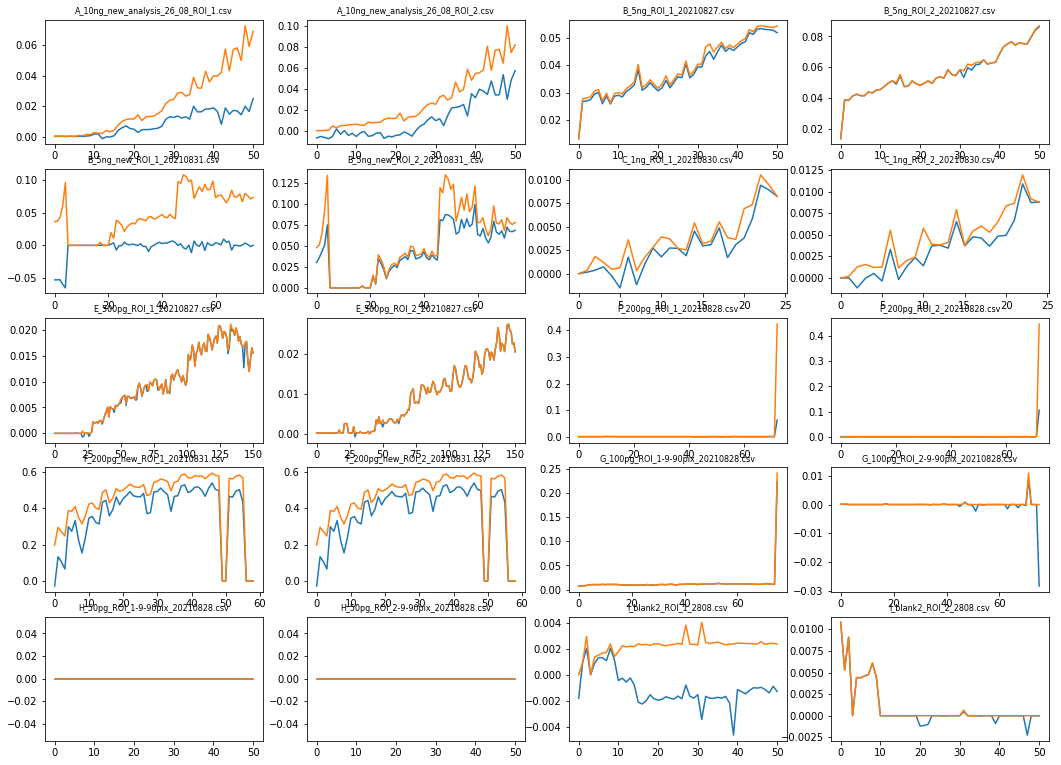

In [8]:
#Raw SIGNAL 
plt.figure(figsize=(18,16))

for i in range(len(data)): 
    df = data[i]
    plt.subplot(6,4,i+1)
    plt.plot(df.loc[:,df.columns[1]])
    #plt.legend(df.columns[1])

    plt.plot(df.loc[:,df.columns[2]])
    #plt.legend(df.columns[2])

    plt.title(df.columns[0],fontsize = 8)
plt.show()

## Mean between ROI

In [9]:
#Mean data between ROI1 and ROI2
'''
d10ng = mean_std(d10ng_R1,d10ng_R2);
d5ng = mean_std(d5ng_R1,d5ng_R2);
d5ng_2 = mean_std(d5ng_R1_2,d5ng_R2_2);
d1ng = mean_std(d1ng_R1,d1ng_R2);
d500pg = mean_std(d500pg_R1,d500pg_R2);
d200pg = mean_std(d200pg_R1,d200pg_R2);
d200pg_2 = mean_std(d200pg_R1_2,d200pg_R2_2);
d100pg = mean_std(d100pg_R1,d100pg_R2);
d50pg = mean_std(d50pg_R1,d50pg_R2);
blank = mean_std(dblank_R1,dblank_R2);
'''

data_mean = []
#for i in range(len(data)):
#    data_mean=

for i in range(1,len(data),2):
    data_mean.append(mean_std(data[i],data[i-1]))

#data_mean = [d10ng, d5ng,d5ng_2, d1ng, d500pg, d200pg,d200pg_2, d100pg, d50pg, blank]
print(len(data_mean))

10


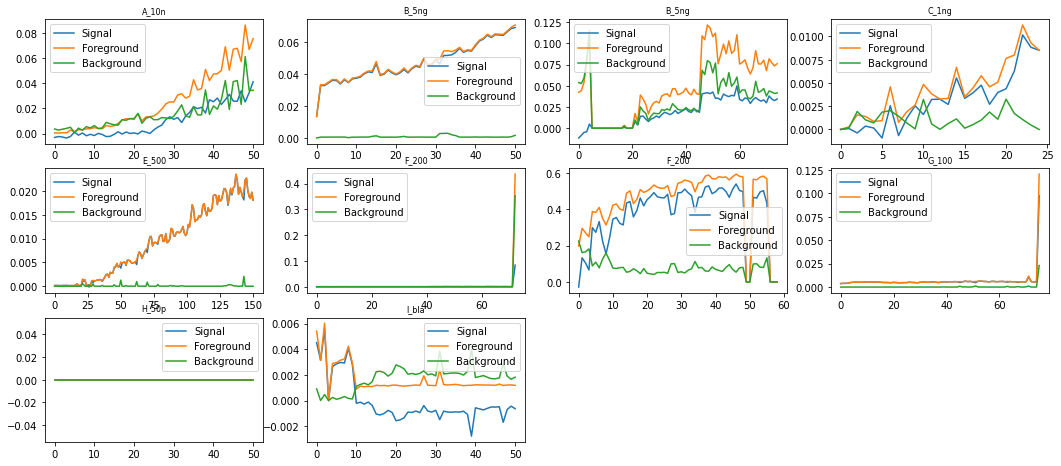

In [10]:
#Plot meaned data
plt.figure(figsize=(18,16))
for i in range(len(data_mean)): 
    df = data_mean[i]
    plt.subplot(6,4,i+1)
    plt.plot(df.loc[:,df.columns[1]])

    plt.plot(df.loc[:,df.columns[2]])
    
    plt.plot(df.loc[:,df.columns[3]])
    
    plt.legend(['Signal', 'Foreground', 'Background'])

    plt.title(df.columns[0],fontsize = 8)
plt.show()

In [11]:
blank = data_mean

## Compute Moving Average

In [12]:
'''
MA10ng = pd.DataFrame(d10ng.iloc[:,1:4].rolling(window=3).mean())
MA5ng = pd.DataFrame(d5ng.iloc[:,1:4].rolling(window=3).mean())
MA5ng_2 = pd.DataFrame(d5ng_2.iloc[:,1:4].rolling(window=3).mean())
MA1ng = pd.DataFrame(d1ng.iloc[:,1:4].rolling(window=3).mean())
MA500pg = pd.DataFrame(d500pg.iloc[:,1:4].rolling(window=3).mean())
MA200pg = pd.DataFrame(d200pg.iloc[:,1:4].rolling(window=3).mean())
MA200pg_2 = pd.DataFrame(d200pg_2.iloc[:,1:4].rolling(window=3).mean())
MA100pg = pd.DataFrame(d100pg.iloc[:,1:4].rolling(window=3).mean())
MA50pg = pd.DataFrame(d50pg.iloc[:,1:4].rolling(window=3).mean())
MAblank = pd.DataFrame(blank.iloc[:,1:4].rolling(window=3).mean())

MA_data = [MA10ng, MA5ng, MA5ng_2, MA1ng, MA500pg, MA200pg, MA200pg_2, MA100pg, MA50pg, MAblank]
MA_data_titles = ['MA10ng', 'MA5ng', 'MA5ng_2', 'MA1ng', 'MA500pg', 'MA200pg','MA200pg_2', 'MA100pg', 'MA50pg', 'MAblank']

'''
MA_data = []
for i in range(0,len(data_mean)):
    MA_data.append(pd.DataFrame(data_mean[i].iloc[:,0:4].rolling(window=3,center=True).median()))


In [13]:
MA_data

[    A_10n    Signal  Foreground  Background
 0     NaN       NaN         NaN         NaN
 1     1.0 -0.002828    0.000490    0.003455
 2     2.0 -0.002828    0.000620    0.003455
 3     3.0 -0.002828    0.000628    0.004130
 4     4.0 -0.002287    0.001654    0.004130
 5     5.0 -0.001301    0.002681    0.004309
 6     6.0  0.000401    0.003008    0.002641
 7     7.0 -0.001301    0.003042    0.004309
 8     8.0 -0.000614    0.003711    0.004438
 9     9.0 -0.001592    0.003824    0.005491
 10   10.0 -0.000614    0.004027    0.004438
 11   11.0 -0.000750    0.004027    0.004510
 12   12.0 -0.000750    0.004027    0.004510
 13   13.0 -0.002184    0.005584    0.007768
 14   14.0 -0.002184    0.006260    0.007768
 15   15.0 -0.000644    0.006260    0.006904
 16   16.0 -0.000443    0.008094    0.006904
 17   17.0  0.001213    0.010613    0.010529
 18   18.0  0.000017    0.011742    0.011056
 19   19.0  0.000494    0.011879    0.011442
 20   20.0  0.000017    0.011936    0.011862
 21   21.0

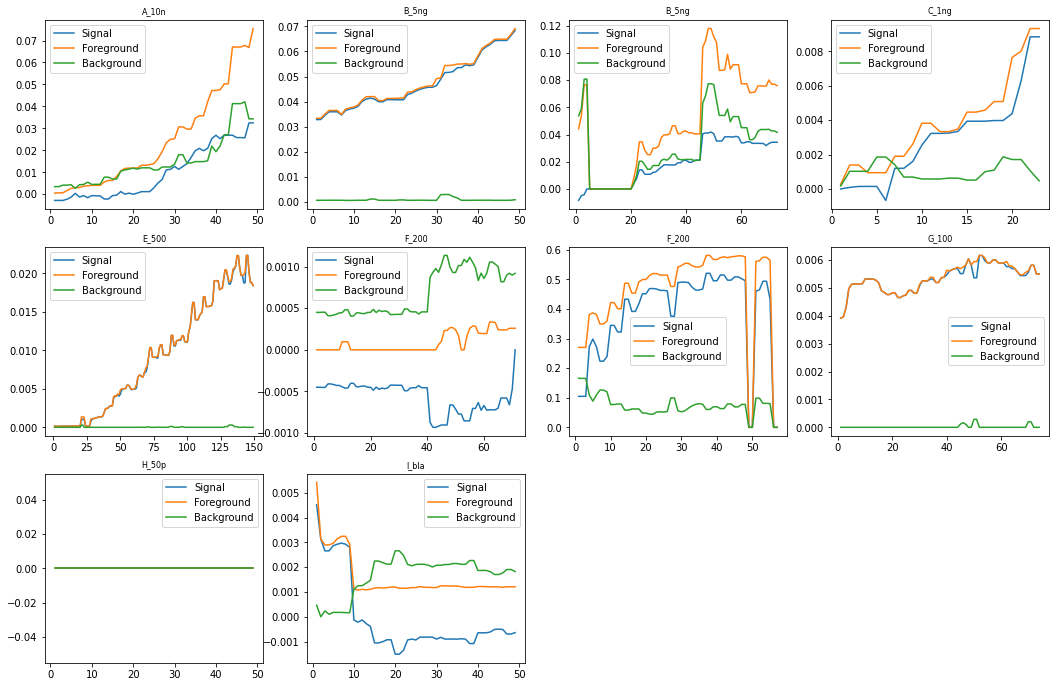

In [14]:
#Plot meaned data
plt.figure(figsize=(18,16))
for i in range(len(MA_data)): 
    df = MA_data[i]
    plt.subplot(4,4,i+1)
    plt.plot(df.loc[:,df.columns[1]])

    plt.plot(df.loc[:,df.columns[2]])
    
    plt.plot(df.loc[:,df.columns[3]])
    plt.legend(['Signal','Foreground', 'Background'])

    plt.title(MA_data[i].columns[0],fontsize = 8)
plt.show()

## Remove Outliers

In [15]:
#Manually substraction outliters

#MA200pg.drop(index=MA200pg.index[-1], axis=0, inplace=True)
#MA200pg_2.drop(index=MA200pg_2.index[-6], axis=0, inplace=True)
#MA100pg.drop(index=MA100pg.index[-1], axis=0, inplace=True)
#MA_data = [MA10ng, MA5ng, MA5ng_2, MA1ng, MA500pg, MA200pg, MA200pg_2, MA100pg, MA50pg, MAblank]

MA_data[6].drop(index=MA_data[6].index[-2:],axis=0, inplace=True)

MA_data[8].drop(index=MA_data[8].index[-2:],axis=0, inplace=True)




In [16]:
MA_data[6]

,F_200,Signal,Foreground,Background
0,NaN,NaN,NaN,NaN
1,1.0,0.104774,0.270315,0.165541
2,2.0,0.104774,0.270315,0.165541
3,3.0,0.104774,0.270315,0.165541
4,4.0,0.272912,0.382036,0.109124
5,5.0,0.298395,0.386864,0.088469
6,6.0,0.272912,0.382036,0.109124
7,7.0,0.223659,0.349677,0.126018
8,8.0,0.223659,0.349677,0.126018
9,9.0,0.239263,0.359255,0.119991


In [17]:


MA_clean = [] #MA_data
std = []

from scipy import stats


for i in range(len(MA_data)):
    #st.append(MA_data[i].rolling(window=3, center = True).std())
    A = MA_data[7].rolling(window=3, center = True).std()
    cleaned = MA_data[i]
    print(A)
    #if (A>3).any() #st[i+1].rolling(window=3).std() > 2*std[i]:
    #    MA_data[i]
    #print(A>3)
    for idx,ele in enumerate(A):
        try:
            if float(ele) > 2:
                cleaned[idx] = (cleaned[idx+1] + cleaned[idx-1 ])/2
        except: 
            print("haha")
        
        
        
    #df['std'] = df['b'].rolling(window).std()

    #filter setup
    #df = df[(df.b <= df['median']+3*df['std']) & (df.b >= df['median']-3*df['std'])]
#print(std)

    G_100    Signal  Foreground  Background
0     NaN       NaN         NaN         NaN
1     NaN       NaN         NaN         NaN
2     1.0  0.000212    0.000212    0.000000
3     1.0  0.000516    0.000516    0.000000
4     1.0  0.000439    0.000439    0.000000
..    ...       ...         ...         ...
71    1.0  0.000147    0.000115    0.000115
72    1.0  0.000182    0.000182    0.000115
73    1.0  0.000182    0.000182    0.000000
74    NaN       NaN         NaN         NaN
75    NaN       NaN         NaN         NaN

[76 rows x 4 columns]
haha
haha
haha
haha
    G_100    Signal  Foreground  Background
0     NaN       NaN         NaN         NaN
1     NaN       NaN         NaN         NaN
2     1.0  0.000212    0.000212    0.000000
3     1.0  0.000516    0.000516    0.000000
4     1.0  0.000439    0.000439    0.000000
..    ...       ...         ...         ...
71    1.0  0.000147    0.000115    0.000115
72    1.0  0.000182    0.000182    0.000115
73    1.0  0.000182    0.000182  

In [18]:
print(MA_data[7].rolling(window=3, center = True).std())

    G_100    Signal  Foreground  Background
0     NaN       NaN         NaN         NaN
1     NaN       NaN         NaN         NaN
2     1.0  0.000212    0.000212    0.000000
3     1.0  0.000516    0.000516    0.000000
4     1.0  0.000439    0.000439    0.000000
..    ...       ...         ...         ...
71    1.0  0.000147    0.000115    0.000115
72    1.0  0.000182    0.000182    0.000115
73    1.0  0.000182    0.000182    0.000000
74    NaN       NaN         NaN         NaN
75    NaN       NaN         NaN         NaN

[76 rows x 4 columns]


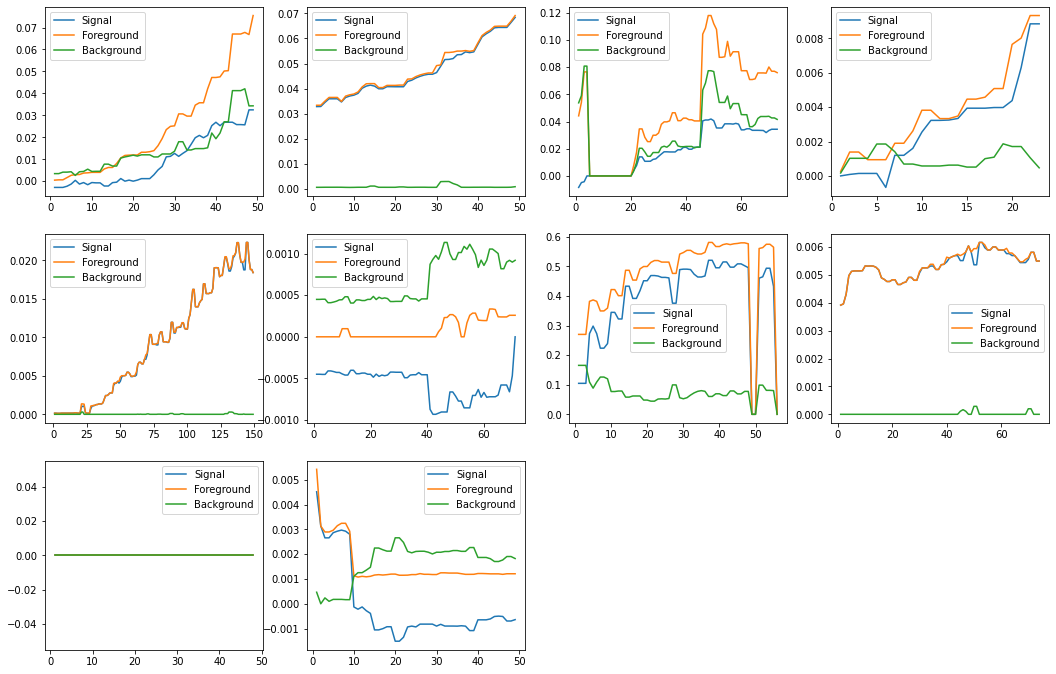

In [19]:
#Plot meaned data
plt.figure(figsize=(18,16))
for i in range(len(MA_data)): 
    df = MA_data[i]
    plt.subplot(4,4,i+1)
    #plot signal
    plt.plot(df.loc[:,df.columns[1]])
    #plot foreground
    plt.plot(df.loc[:,df.columns[2]])
    #plot background
    plt.plot(df.loc[:,df.columns[3]])
    plt.legend(['Signal','Foreground', 'Background'])

    #plt.title(MA_data_titles[i],fontsize = 8)
plt.show()

In [20]:
from scipy.stats import linregress

def linreg(df):
    df.dropna(inplace=True)
    slope, intercept, r, p, stderr = linregress(np.array(df.index), df.loc[:,df.columns[1]])
    return slope, intercept, stderr

In [21]:
MA_data[2].columns[0]

'B_5ng'

['A_10n', 'B_5ng', 'B_5ng', 'C_1ng', 'E_500', 'F_200', 'F_200', 'G_100', 'H_50p', 'I_bla']


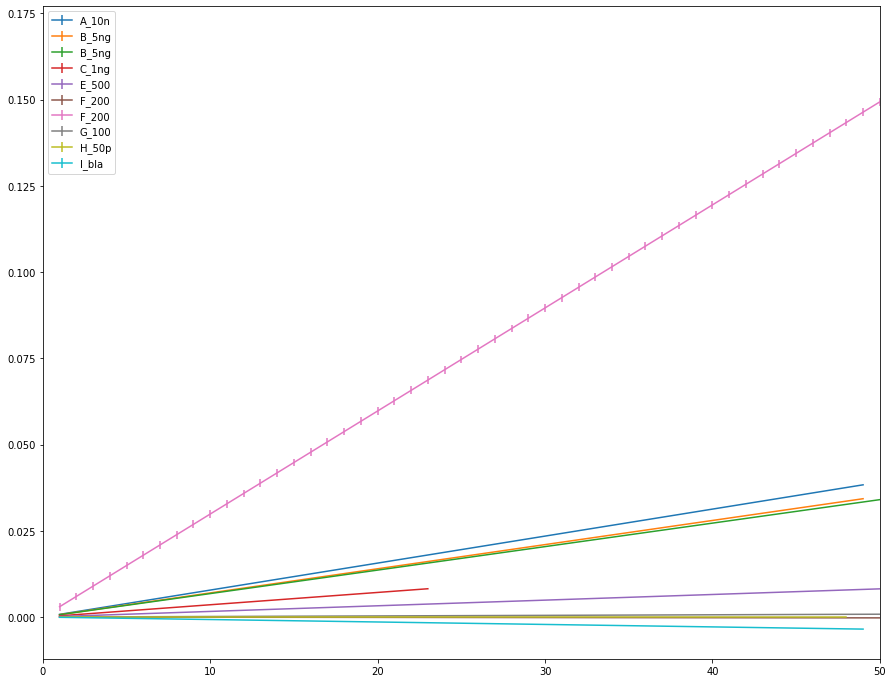

In [22]:
total_slopes = []
total_inter = []
total_std = []
plt.figure(figsize=(15,12))

MA_titles= []

for i in range(len(MA_data)):
    MA_titles.append(str(MA_data[i].columns[0]))
    
print(MA_titles)

for d in MA_data:
    slope, inter, error = linreg(d)
    total_slopes.append(slope)
    total_inter.append(inter)
    total_std.append(error)
    x = np.array(d.index)
    y = slope*x#+inter
    plt.errorbar(x,y,error)
    plt.legend(MA_titles)
    plt.xlim(0,50)



In [23]:
for i in range(len(MA_titles)): print("{} :  slope = {} ".format(MA_titles[i],total_slopes[i]))

A_10n :  slope = 0.0007822692535842907 
B_5ng :  slope = 0.0007000387987277008 
B_5ng :  slope = 0.0006806691556603673 
C_1ng :  slope = 0.0003568857585133743 
E_500 :  slope = 0.00016361321331942675 
F_200 :  slope = -4.657322936469309e-06 
F_200 :  slope = 0.002986623687507926 
G_100 :  slope = 1.6567487569314715e-05 
H_50p :  slope = 0.0 
I_bla :  slope = -7.120898817694794e-05 


In [24]:
good_slope = total_slopes

good_slope.pop(-5)
good_slope.pop(0)
#good_slope.pop(0)

0.0007822692535842907

[0.0007000387987277008, 0.0006806691556603673, 0.0003568857585133743, 0.00016361321331942675, 0.002986623687507926, 1.6567487569314715e-05, 0.0, -7.120898817694794e-05]
[0.0007000387987277008, 0.0006806691556603673, 0.0003568857585133743, 0.00016361321331942675, 0.002986623687507926, 1.6567487569314715e-05, 0.0, -7.120898817694794e-05]


ValueError: x and y must be the same size

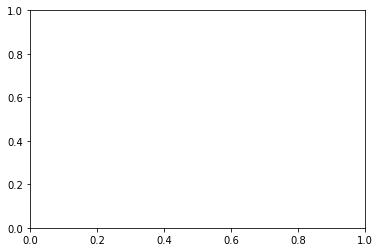

In [25]:
from math import log
c_sample=[10000,5000,5000,1000,500,200,100,50,1]

print(total_slopes)
print(good_slope)

plot_sample=[log(y,10) for y in c_sample]
plt.scatter(plot_sample, total_slopes)
plt.ylim([-0.0001,0.001])
plt.xlabel('plot_sample')
plt.ylabel('total_slopes')

In [ ]:
from math import log
y_good = c_sample
print(y_good)
plot_sample=[log(y,10) for y in y_good]
slop_good=total_slopes  #TODO: ??????? WHAT'S THIS?
plt.figure()
plt.scatter(plot_sample,slop_good)
plt.figure()
plt.scatter(y_good,slop_good)

In [ ]:
print(slop_good)
print(plot_sample)

X = total_slopes
print(X)

In [ ]:
from scipy.optimize import curve_fit

xdata = np.array(c_sample[1:])
ydata = np.array(total_slopes[1:])
print(xdata)
print(ydata)

def sigmoid(x, a, h, slope): #(x, a, b):
    #y = 1/(1+np.exp((x-h)/slope))*a+c
    #y = 1 / (1 + np.exp(-b*(x-a)))
    y = a*np.exp(-np.logaddexp(0,-(x-h)/slope))
    return y

def linear(x, a, b):
    return a*x + b


# Fits the function sigmoid with the x and y data
#   Note, we are using the cumulative sum of your beta distribution!


p, _ = curve_fit(sigmoid, xdata, ydata, maxfev=10000)
p_linear, _ = curve_fit(linear, xdata, ydata, maxfev = 10000)

x = np.linspace(-7,5,50)
y = sigmoid(x, *p)
y_linear = linear(x, *p_linear)

# Plots the data
plt.scatter(xdata, ydata, label='original')
plt.plot(x, y, label='sigmoid fit')
plt.xscale('log')
plt.plot(x, y_linear, label='linear fit')
plt.xlabel('Concentration')
plt.ylabel('Slope')
plt.title('Calibration curve')
plt.legend()
plt.ylim([-0.0001,0.0007])

print('sigmoid params: ', p)
print('linear params: ', p_linear)

In [ ]:
c_sample

In [ ]:
c_sample[1:]

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

clf = logisticRegr.fit(xdata, ydata)

print(clf.score(xdata, ydata))

In [ ]:

z = np.polyfit(xdata, ydata, 4)

print(z)

In [ ]:
xdata.reshape(-1,1)

In [ ]:
y = np.polyval(z, xdata)

In [ ]:
plt.plot(xdata,y)